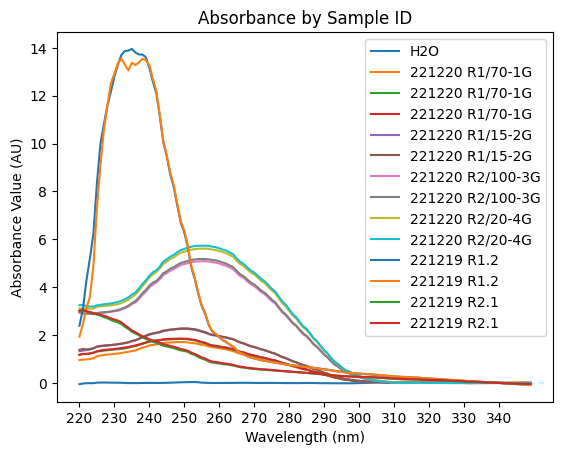

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read the NDV file into a DataFrame
with open('221220rserisi.ndv') as doc:
    lines = [line.rstrip("\n") for line in doc] 
    mydata = []
    for i in lines:
        mydata.append(i.replace("\t", " "))
    
    
    temp = [item for item in mydata[4].split()]
    columns = []
    for i in range(len(temp)):
        if temp[i]=='ID' or temp[i]=='#' or temp[i]=='Type' or temp[i]=='raw' or temp[i]=='abs.' or temp[i]=='Pos.':
            columns[-1]=columns[-1] + ' ' + temp[i]
        else:
            columns.append(temp[i])
    
    data1 = mydata[5:]
    temp1 = [[a for a in i.split()] for i in data1]
    for i in range(len(temp1)):
        if len(temp1[i])==149:
            None
        else:
            for j in range(len(temp1[i])-149):
                temp1[i][0] += ' ' + temp1[i][1]
                temp1[i].pop(1)
        temp1[i][3]=temp1[i][3] + ' ' + temp1[i][4]
        temp1[i].pop(4)
        temp1[i][14]=temp1[i][14] + ' ' + temp1[i][15]
        temp1[i].pop(15)
    myfile = pd.DataFrame(temp1, columns=columns) 
    myfile.iloc[:,16:] = myfile.iloc[:,16:].astype(float)
    myfile.iloc[:,4:12] = myfile.iloc[:,4:12].astype(float)   
# Set the colors and line styles to use for the plots
# Iterate over the absorbance columns
for i, row in myfile.iterrows():
    ax = plt.gca()
    residue = len(myfile.columns[16:])%10 #value for xticks
    y = row[16:len(myfile.columns)-residue]
    x = myfile.columns[16:len(myfile.columns)-residue].astype(int)
    label = row['Sample ID'] 
    colormap = plt.cm.nipy_spectral   
    colors = colormap(np.linspace(0, 1, len(myfile.columns[16:])))
    color = colors[i % len(colors)]
   
    plt.rc(colors)# Use a color from the list, repeating as necessary
    plt.xticks(range(x[0],x[-1],10)) #X axis is too dirty to be shown, so trim the xticks by 10
    plt.plot(x, y, label=label)  # Create the line plot
plt.title('Absorbance by Sample ID')  # Set the plot title
plt.xlabel('Wavelength (nm)')  # Set the x-axis label
plt.ylabel('Absorbance Value (AU)')
plt.legend()
plt.show()


In [2]:
f = open("./221220rserisi.ndv",'r')
l = f.readline()
while f:
    if l.startswith("Firmware"): break
    l = f.readline()
file = pd.read_csv(f, sep="\t",index_col=0).T
print(file)
f.close()


Sample ID         H2O 221220 R1/70-1G 221220 R1/70-1G 221220 R1/70-1G  \
User ID      Default         Default         Default         Default    
Date        3/9/2009        3/9/2009        3/9/2009        3/9/2009    
Time         5:37 AM         5:38 AM         5:38 AM         5:39 AM    
ng/ul           -0.27           72.61           75.51           76.27   
A260           -0.005           1.452            1.51           1.525   
...               ...             ...             ...             ...   
346             0.006           0.018          -0.002           -0.01   
347             0.005            0.02          -0.003          -0.013   
348             0.008           0.017          -0.004           -0.01   
349             0.005           0.011          -0.005          -0.012   
350             0.006           0.005          -0.005          -0.011   

Sample ID 221220 R1/15-2G 221220 R1/15-2G 221220 R2/100-3G 221220 R2/100-3G  \
User ID          Default         Default    